In [1]:
import pandas as pd
from pathlib import Path
import glob
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle
import pandas_profiling

In [2]:
home = Path.cwd()
home

PosixPath('/Users/germanportes/Documents/general_assembly/projects/final_project')

In [3]:
stocks = pd.read_csv("../final_project/sp500_1.csv")
#stocks = pd.read_csv("../final_project/sp500_1.csv").profile_report()
stocks.sample(10)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker
486731,2018-03-20,193.729996,192.009995,192.839996,192.550003,308000.0,192.550003,0.008958,-0.001504,WCG
499677,2017-09-12,65.330002,64.459999,64.650002,65.000000,2526600.0,62.801128,0.013497,0.005414,XLNX
89310,2017-02-28,31.540001,30.889999,31.540001,30.900000,2523800.0,30.900000,0.021042,-0.020292,CDNS
400454,2016-12-14,68.580002,66.870003,68.449997,66.980003,1096800.0,60.865131,0.025572,-0.021475,REG
459256,2018-11-14,21.895000,20.900000,21.330000,20.950001,3026600.0,20.950001,0.047608,-0.017815,UA
215879,2018-02-20,224.080002,221.179993,223.000000,221.830002,1211100.0,215.044250,0.013112,-0.005247,GD
246288,2018-12-18,306.709991,289.179993,305.070007,292.019989,1497200.0,289.681061,0.060620,-0.042777,HUM
245251,2018-11-05,24.770000,24.420000,24.629999,24.639999,7039000.0,23.861792,0.014333,0.000406,HPQ
468985,2017-08-04,68.930000,68.300003,68.500000,68.529999,3201800.0,62.988518,0.009224,0.000438,VLO
36365,2016-01-22,93.589996,90.330002,90.910004,93.250000,3258300.0,86.507950,0.036090,0.025740,AMT


In [4]:
# simple rolling average
stocks['SMA_5'] = stocks.iloc[:,1].rolling(window=5).mean()

In [5]:
stocks.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
141448,2019-09-12,140.000000,137.050003,138.419998,138.809998,1699100.0,138.809998,0.021525,0.002818,CCI,143.370001
107107,2015-10-12,50.730000,49.259998,50.380001,50.380001,2107900.0,43.913006,0.029842,0.000000,CF,52.030000
468707,2016-06-28,52.049999,50.529999,52.049999,51.830002,7708900.0,45.703316,0.030081,-0.004227,VLO,52.918000
320663,2015-11-17,339.000000,331.850006,333.079987,336.320007,170700.0,336.320007,0.021546,0.009727,MTD,334.544000
86644,2018-07-31,53.349998,52.830002,53.040001,53.220001,1678800.0,52.018227,0.009843,0.003394,BF.B,54.284000


In [6]:
# any missing data
stocks.isnull().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
HL_pct_diff       0
daily_pct_chng    0
ticker            0
SMA_5             4
dtype: int64

In [7]:
#size
stocks.shape

(505207, 11)

In [8]:
# Establish our target variables: "runs"
stocks['Close'].describe()

count    505207.000000
mean        106.499921
std         171.910724
min           1.740000
25%          44.410000
50%          72.330002
75%         116.739998
max        3766.270020
Name: Close, dtype: float64

In [9]:
# How many unique companies are there?
stocks['ticker'].nunique()

505

In [10]:
# Which stocks have the highest volume or traded daily?
stocks.sort_values(by = 'Volume', ascending=True).sample(20)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
363592,2018-03-28,57.130001,55.580002,56.880001,55.630001,3115200.0,51.475212,0.027888,-0.021976,OKE,57.680000
418601,2017-03-13,169.759995,166.889999,169.000000,168.690002,2719600.0,149.904739,0.017197,-0.001834,SPG,174.463998
429334,2015-11-20,43.939999,43.279999,43.750000,43.480000,2193200.0,38.981533,0.015250,-0.006171,STI,43.582000
305907,2017-02-08,16.240000,15.630000,15.860000,15.880000,13282300.0,15.333027,0.039027,0.001261,MRO,16.810000
308591,2015-10-02,71.489998,68.839996,69.099998,71.459999,2748900.0,67.628830,0.038495,0.034153,MAR,224.987996
335106,2017-03-14,96.760002,94.750000,95.010002,96.330002,776500.0,93.415054,0.021214,0.013893,MSCI,95.686002
175705,2019-02-05,92.849998,88.889999,89.059998,92.519997,11931400.0,92.519997,0.044549,0.038850,EA,91.758000
116369,2016-07-14,77.300003,76.389999,77.300003,76.760002,460700.0,70.033127,0.011913,-0.006986,CINF,76.496001
182502,2018-01-24,233.360001,230.509995,231.410004,231.550003,271100.0,220.085068,0.012364,0.000605,ESS,228.866000
497651,2017-07-19,46.630001,46.270000,46.450001,46.619999,3843600.0,43.808170,0.007780,0.003660,XEL,46.248001


In [11]:
stocks_volume=stocks.groupby('ticker')['Volume'].sum().sort_values(ascending=False)
stocks_volume.head()

ticker
BAC     7.998436e+10
GE      6.550756e+10
AMD     5.947630e+10
F       3.855452e+10
AAPL    3.329668e+10
Name: Volume, dtype: float64

In [12]:
apple = stocks.loc[stocks['ticker'].isin(['BAC'])]
apple.sample(5)

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
68148,2017-03-08,25.770000,25.219999,25.600000,25.260000,105314600.0,24.078508,0.021808,-0.013281,BAC,25.586
67816,2015-11-10,17.940001,17.559999,17.629999,17.850000,59905800.0,16.655081,0.021640,0.012479,BAC,17.758
67889,2016-02-26,12.950000,12.400000,12.490000,12.700000,160314400.0,11.883198,0.044355,0.016813,BAC,12.490
68240,2017-07-19,24.200001,23.809999,24.049999,24.059999,74140100.0,23.009964,0.016380,0.000416,BAC,24.286
68302,2017-10-16,26.330000,25.870001,25.870001,26.240000,71927200.0,25.223185,0.017781,0.014302,BAC,26.028


In [13]:
# any missing data
apple.isnull().sum()

Date              0
High              0
Low               0
Open              0
Close             0
Volume            0
Adj Close         0
HL_pct_diff       0
daily_pct_chng    0
ticker            0
SMA_5             0
dtype: int64

In [14]:
# size
apple.shape

(1008, 11)

In [15]:
apple.head()

,Date,High,Low,Open,Close,Volume,Adj Close,HL_pct_diff,daily_pct_chng,ticker,SMA_5
67788,2015-10-01,15.64,15.36,15.52,15.55,71516800.0,14.509049,0.018229,0.001933,BAC,61.718001
67789,2015-10-02,15.38,14.63,15.08,15.38,181838400.0,14.350430,0.051265,0.019894,BAC,49.818002
67790,2015-10-05,15.79,15.44,15.45,15.69,75315300.0,14.639676,0.022668,0.015534,BAC,38.352001
67791,2015-10-06,15.82,15.57,15.68,15.69,67473700.0,14.639676,0.016057,0.000638,BAC,26.884000
67792,2015-10-07,15.93,15.57,15.78,15.75,66655600.0,14.695662,0.023121,-0.001901,BAC,15.712000


In [16]:
# establish target variable: High
apple['Close'].describe()

count    1008.000000
mean       23.876657
std         6.157061
min        11.160000
25%        17.252501
50%        25.040000
75%        29.200001
max        32.840000
Name: Close, dtype: float64

In [55]:
apple_stock = apple[['Low', 'High','Open','SMA_5', 'Volume', 'daily_pct_chng',]]

In [56]:
apple_stock.sample(5)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
68555,28.160000,29.190001,28.370001,28.936,79068700.0,0.018682
68177,22.680000,23.150000,22.920000,23.006,101771800.0,-0.007853
67904,13.550000,13.880000,13.680000,13.702,146616200.0,0.008041
68471,28.950001,29.370001,29.040001,29.738,65466200.0,0.007576
68566,27.610001,28.000000,27.770000,27.300,49827300.0,0.001440


In [19]:
#apple_stock['ticker'] = apple['ticker']

In [57]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng
67788,15.36,15.64,15.52,61.718001,71516800.0,0.001933
67789,14.63,15.38,15.08,49.818002,181838400.0,0.019894
67790,15.44,15.79,15.45,38.352001,75315300.0,0.015534
67791,15.57,15.82,15.68,26.884000,67473700.0,0.000638
67792,15.57,15.93,15.78,15.712000,66655600.0,-0.001901


In [21]:
#apple.to_csv('BAC.csv')

In [58]:
# standardize variables
from sklearn.preprocessing import StandardScaler
std_scaler =StandardScaler()

In [59]:
#std_scaler.fit(stock_high)
std_scaler.fit(apple_stock)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
scaled_stock =std_scaler.transform(apple_stock)

In [61]:
import pickle
filename = open('BAC_fitted_scaler.pkl', 'wb')
pickle.dump(scaled_stock, filename)
filename.close()

In [62]:
#scaled_df=pd.DataFrame(scaled_stock, columns = stock_high.columns)
scaled_df=pd.DataFrame(scaled_stock, columns = apple_stock.columns)
scaled_df.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng
0,-1.354033,-1.366756,-1.357357,5.905677,-0.200219,0.138958
1,-1.473412,-1.408711,-1.428820,4.032679,2.619790,1.488984
2,-1.340951,-1.342551,-1.368726,2.227991,-0.103123,1.161270
3,-1.319691,-1.337710,-1.331370,0.422987,-0.303567,0.041601
4,-1.319691,-1.319959,-1.315129,-1.335428,-0.324480,-0.149230


In [63]:
scaled_df.mean() 

Low              -4.549932e-16
High              1.600351e-16
Open             -6.075387e-16
SMA_5            -6.197644e-16
Volume           -1.500123e-16
daily_pct_chng   -2.731501e-17
dtype: float64

In [64]:
scaled_df.std()

Low               1.000496
High              1.000496
Open              1.000496
SMA_5             1.000496
Volume            1.000496
daily_pct_chng    1.000496
dtype: float64

In [65]:
# target variable
#y = top_5['Close']
y = apple['Close']
y.shape
y.head

<bound method NDFrame.head of 67788    15.550000
67789    15.380000
67790    15.690000
67791    15.690000
67792    15.750000
           ...    
68791    29.129999
68792    29.350000
68793    29.170000
68794    28.440001
68795    27.840000
Name: Close, Length: 1008, dtype: float64>

In [66]:
X= apple.drop('Close', axis=1)
X = scaled_df.copy()
X.shape
X.sample(10)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
326,-0.251825,-0.235567,-0.256179,-0.187075,1.150697,1.105967
116,-1.650027,-1.650763,-1.656202,-1.651791,1.719450,0.598059
567,0.976303,0.934351,0.953818,0.890449,-0.568185,0.372647
67,-1.340951,-1.324800,-1.323250,-1.216437,0.943389,-1.105367
302,-0.179871,-0.138746,-0.142488,-0.207537,1.473286,-1.280859
468,0.073604,0.075873,0.114129,0.121104,-0.033891,-1.412989
674,0.922337,0.958556,0.879107,0.847323,-0.111290,1.918331
398,-0.050680,-0.070971,-0.043414,-0.053604,-0.487896,-0.261019
404,0.037627,0.009713,0.005311,-0.012682,-0.788688,0.748141
43,-0.995897,-1.003678,-0.974056,-1.027249,-0.062129,-1.099322


In [93]:
# train, test, split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.15, random_state=42)

In [94]:
# instantiate
mystocks= LinearRegression()
#linreg=LinearRegression()
mystocks.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
# fit model  to training dataset
mystocks.fit(X_train, y_train)  # normalize = False, data is expected to be already centered
y_pred = mystocks.predict(X_test)

In [109]:
# predict the y_values on testing dataset
y_pred = mystocks.predict(X_test)
y_pred

array([27.69908311, 29.72815233, 29.30711431, 26.22386866, 25.18743775,
       30.60886257, 30.82527411, 27.73487632, 22.97509184, 15.18029423,
       27.34417712, 23.1418617 , 28.74659011, 24.51211318, 15.54268525,
       32.05124833, 30.00255184, 26.47481855, 22.07807722, 12.8739361 ,
       30.74307286, 32.45261967, 15.17804982, 15.75193945, 30.07855244,
       18.93239943, 23.6346744 , 20.14505975, 22.6532727 , 28.88637101,
       31.75282538, 29.57710343, 12.04758846, 15.53618847, 31.07369813,
       13.23523221, 30.59959508, 14.24864967, 16.06085936, 15.01203478,
       24.85862808, 27.52301   , 23.33308008, 29.44207655, 21.95308704,
       21.16444794, 23.25460247, 26.69122545, 26.72119979, 27.28486231,
       31.95601786, 28.217579  , 17.25520944, 29.66253877, 29.45066592,
       30.29287189, 23.21385988, 17.2066014 , 17.23426809, 17.33311598,
       30.07000258, 23.61728107, 16.31472666, 29.32586112, 24.15541477,
       23.85981201, 24.8806697 , 14.27767731, 24.81260187, 26.31

In [97]:
#looking at prediction and comparing to true values
[round(x,2)for x in y_pred[:5]]

[27.7, 29.73, 29.31, 26.22, 25.19]

In [98]:
list(y_test[:5])

[27.76000022888184,
 29.8799991607666,
 29.399999618530273,
 26.239999771118164,
 25.18000030517578]

In [99]:
# root mean Sq error
rmse = sqrt(metrics.mean_squared_error(y_test, y_pred))
print ('on average my model errs by', rmse)

on average my model errs by 0.08301500902710836


In [100]:
avg_val= y_train.mean()
avg_val

23.868411219008614

In [101]:
comparison_array=np.full((len(y_test), ), avg_val)
coin_flip = sqrt(metrics.mean_squared_error(y_test, comparison_array))
print ('Close', round(rmse-coin_flip))

Close -6


In [102]:
r2=metrics.r2_score(y_test, y_pred)
r2

0.9998071773961114

In [77]:
comparison = np.full(len(y_test), avg_val)
comparison

array([23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80633177,
       23.80633177, 23.80633177, 23.80633177, 23.80633177, 23.80

In [78]:
sqrt(metrics.mean_squared_error(y_test, comparison))

5.880136650784015

In [79]:
y_pred

array([13.17336271, 15.69613911, 12.86158624, 27.97752979, 25.28706495,
       13.83559261, 28.55492344, 14.32090549, 24.53601808, 13.61677505,
       25.59740176, 22.66991648, 29.80799694, 22.1230698 , 25.28514117,
       24.66210137, 23.01669849, 29.72047156, 24.76042873, 26.33563346,
       18.00575195, 29.87674022, 12.67129248, 28.64187575, 16.66829336,
       16.71033471, 23.50732226, 28.71299441, 28.0423036 , 22.2418047 ,
       13.5961298 , 27.76400156, 15.87007045, 23.88966718, 28.49953608,
       13.45894923, 22.89717971, 28.07211011, 24.01337951, 27.96833347,
       30.87404085, 24.69665596, 31.67200817, 29.36579677, 32.34205302,
       27.54568294, 30.86193793, 13.12102114, 29.9212163 , 22.81609509,
       28.36846985, 14.6754774 , 14.43625124, 26.96267373, 29.10401421,
       29.52709301, 28.99272464, 14.69723822, 25.7472264 , 30.0421066 ,
       26.81000164, 13.11182344, 23.89580056, 29.09050449, 29.06145899,
       29.95713275, 26.21261714, 24.53357166, 25.2248767 , 26.22

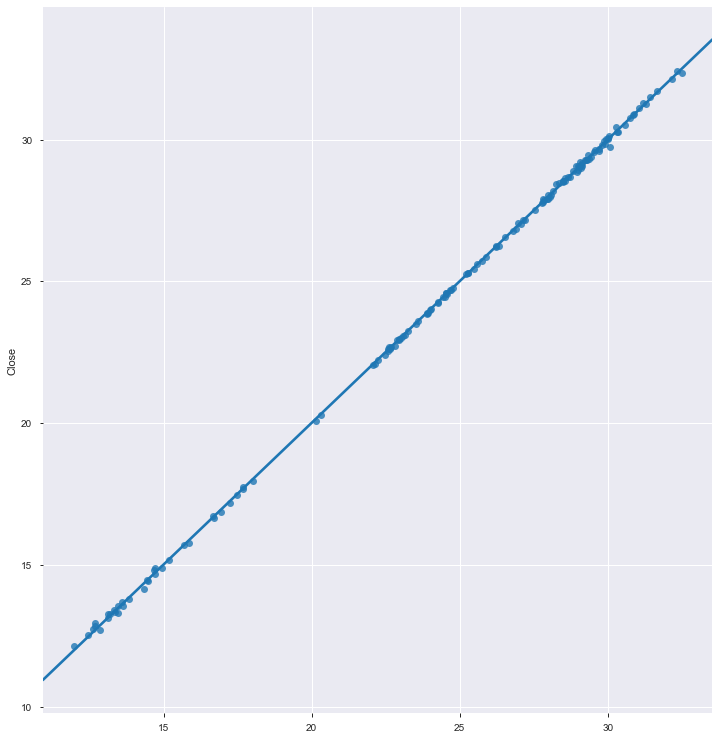

In [80]:
plt.figure(figsize = (12,13))
sns.regplot(x=y_pred, y=y_test);

In [121]:
apple_stock['ticker'] = apple['ticker']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [126]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng,ticker
67788,15.36,15.64,15.52,61.718001,71516800.0,0.001933,BAC
67789,14.63,15.38,15.08,49.818002,181838400.0,0.019894,BAC
67790,15.44,15.79,15.45,38.352001,75315300.0,0.015534,BAC
67791,15.57,15.82,15.68,26.884000,67473700.0,0.000638,BAC
67792,15.57,15.93,15.78,15.712000,66655600.0,-0.001901,BAC


In [141]:
# pickle final model
filename = open('BACstock_model.pkl', 'wb')
pickle.dump(apple_stock, filename)
filename.close()

In [142]:
X_test.sample(10)

,Low,High,Open,SMA_5,Volume,daily_pct_chng
495,0.160276,0.142034,0.133619,0.065386,-0.591280,0.480563
514,0.364692,0.358267,0.323646,0.288257,-0.189728,1.068688
618,1.380228,1.365203,1.337120,1.338395,0.104753,0.134112
168,-1.450517,-1.473259,-1.449934,-1.453789,-0.383995,-0.056611
993,0.861830,0.918214,0.867738,0.773663,-0.163740,1.151234
218,-1.461965,-1.484554,-1.479169,-1.434272,-0.417123,0.706124
66,-1.246102,-1.261867,-1.248538,-1.174255,0.598431,-0.517027
605,1.419475,1.410386,1.371227,1.286769,-0.258533,0.016929
380,-0.080116,-0.037084,-0.017427,-0.059586,0.462762,-1.903629
792,0.590366,0.589023,0.603001,0.573771,-0.996528,-0.878120


In [143]:
y_test.head(10)

68726    27.760000
68418    29.879999
68470    29.400000
68302    26.240000
68153    25.180000
68443    30.719999
68444    30.889999
68317    27.750000
68109    22.940001
67858    15.310000
Name: Close, dtype: float64

In [144]:
stock_filter = apple.loc[apple['ticker']=='BAC']
#stock_filter = top_5.loc[top_5['ticker']]
print(len(stock_filter))
print (stock_filter.head())

1008
             Date   High    Low   Open  Close       Volume  Adj Close  \
67788  2015-10-01  15.64  15.36  15.52  15.55   71516800.0  14.509049   
67789  2015-10-02  15.38  14.63  15.08  15.38  181838400.0  14.350430   
67790  2015-10-05  15.79  15.44  15.45  15.69   75315300.0  14.639676   
67791  2015-10-06  15.82  15.57  15.68  15.69   67473700.0  14.639676   
67792  2015-10-07  15.93  15.57  15.78  15.75   66655600.0  14.695662   

       HL_pct_diff  daily_pct_chng ticker      SMA_5  
67788     0.018229        0.001933    BAC  61.718001  
67789     0.051265        0.019894    BAC  49.818002  
67790     0.022668        0.015534    BAC  38.352001  
67791     0.016057        0.000638    BAC  26.884000  
67792     0.023121       -0.001901    BAC  15.712000  


In [145]:
stock_filter['Close'].mean()

23.876656744215225

In [146]:
print ('actual high', y_test[68726])
print ('predicted', round(y_pred[0]))
## talk to austin about this

actual high 27.76000022888184
predicted 28.0


In [147]:
# predict the y-values
y_pred = mystocks.predict(X_test)
for i in y_pred[:5]:
    print(round(i,0))

28.0
30.0
29.0
26.0
25.0


In [148]:
# How similar are those to the actual high prices?
for i in y_test[:5]:
    print(round(i,0))

28.0
30.0
29.0
26.0
25.0


In [149]:
# the residuals are the difference between true y values and predicted y values.
residuals= y_test - y_pred
for i in residuals[:5]:
    print(round(i,0))

0.0
0.0
0.0
0.0
-0.0


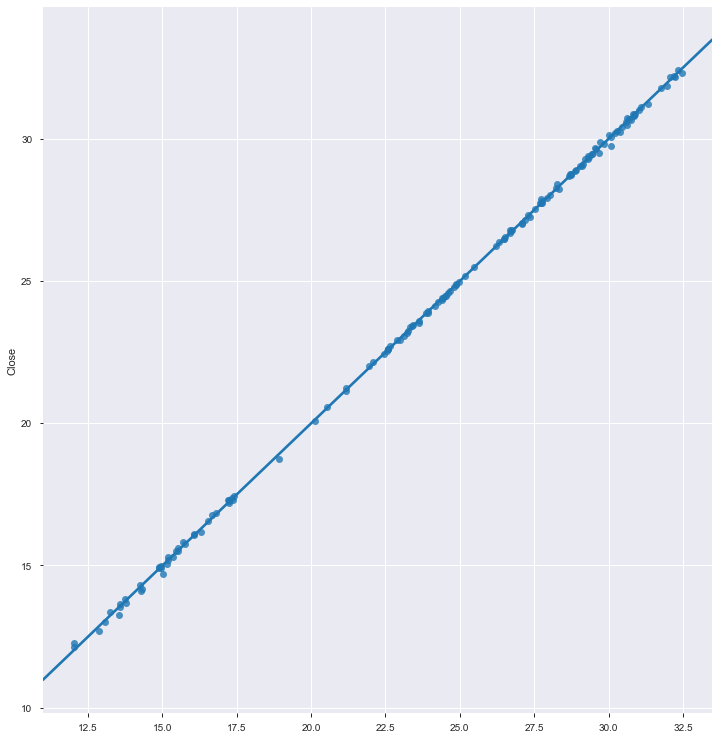

In [150]:
# Use a scatter plot to compare our predictions to the actual values
# Remember: when x==y, that indicates an accurate model! 
# Do we have that?
plt.figure(figsize=(12, 13))
sns.regplot(y_pred, y_test);

In [151]:
apple_stock['ticker'] = apple['ticker']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [152]:
apple_stock.head()

,Low,High,Open,SMA_5,Volume,daily_pct_chng,ticker
67788,15.36,15.64,15.52,61.718001,71516800.0,0.001933,BAC
67789,14.63,15.38,15.08,49.818002,181838400.0,0.019894,BAC
67790,15.44,15.79,15.45,38.352001,75315300.0,0.015534,BAC
67791,15.57,15.82,15.68,26.884000,67473700.0,0.000638,BAC
67792,15.57,15.93,15.78,15.712000,66655600.0,-0.001901,BAC


In [153]:
apple.to_csv('BAC.csv')

In [154]:
unpickled_df = pd.read_pickle('/Users/germanportes/Documents/general_assembly/projects/final_project/BACstock_model.pkl')
unpickled_df

,Low,High,Open,SMA_5,Volume,daily_pct_chng,ticker
67788,15.360000,15.640000,15.520000,61.718001,71516800.0,0.001933,BAC
67789,14.630000,15.380000,15.080000,49.818002,181838400.0,0.019894,BAC
67790,15.440000,15.790000,15.450000,38.352001,75315300.0,0.015534,BAC
67791,15.570000,15.820000,15.680000,26.884000,67473700.0,0.000638,BAC
67792,15.570000,15.930000,15.780000,15.712000,66655600.0,-0.001901,BAC
...,...,...,...,...,...,...,...
68791,29.049999,29.330000,29.209999,29.626000,33198100.0,-0.002739,BAC
68792,29.209999,29.709999,29.410000,29.542000,41336600.0,-0.002040,BAC
68793,29.080000,29.520000,29.490000,29.522000,39191000.0,-0.010851,BAC
68794,28.410000,29.510000,29.440001,29.496000,49434400.0,-0.033967,BAC


In [155]:
# And here's a reminder of how to read that back in again, just in case this is unfamiliar:
file = open('/Users/germanportes/Documents/general_assembly/projects/final_project/BACstock_model.pkl', 'rb')
BAC=pickle.load(file)
file.close()
BAC

,Low,High,Open,SMA_5,Volume,daily_pct_chng,ticker
67788,15.360000,15.640000,15.520000,61.718001,71516800.0,0.001933,BAC
67789,14.630000,15.380000,15.080000,49.818002,181838400.0,0.019894,BAC
67790,15.440000,15.790000,15.450000,38.352001,75315300.0,0.015534,BAC
67791,15.570000,15.820000,15.680000,26.884000,67473700.0,0.000638,BAC
67792,15.570000,15.930000,15.780000,15.712000,66655600.0,-0.001901,BAC
...,...,...,...,...,...,...,...
68791,29.049999,29.330000,29.209999,29.626000,33198100.0,-0.002739,BAC
68792,29.209999,29.709999,29.410000,29.542000,41336600.0,-0.002040,BAC
68793,29.080000,29.520000,29.490000,29.522000,39191000.0,-0.010851,BAC
68794,28.410000,29.510000,29.440001,29.496000,49434400.0,-0.033967,BAC
